<a href="https://colab.research.google.com/github/ab17254/ce888/blob/main/Assignment/plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')

from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
!unzip /content/data.zip

Archive:  /content/data.zip
   creating: content/data/
  inflating: content/data/arrest_essex.csv  
  inflating: content/data/arrest_suffolk.csv  
  inflating: content/data/arrest_manchester.csv  
  inflating: content/data/arrest_lancashire.csv  
  inflating: content/data/arrest_london.csv  
  inflating: content/data/data_all.csv  
  inflating: content/data/arrest_all.csv  
  inflating: content/data/arrest_wiltshire.csv  
  inflating: content/data/arrest_all_new.csv  


In [4]:
df = pd.read_csv('/content/content/data/data_all.csv')
df

,Unnamed: 0,Time,All,Asian,Black,Mixed,Other,White,Asian Officers,Black Officers,Mixed Officers,Other Officers,White Officers
0,0,2006/07,31.376667,17.333333,60.00,31.8,24.0,23.75,2111,1350,1419,632,134372
1,1,2007/08,33.060000,19.000000,62.75,31.8,26.0,25.75,2231,1371,1525,656,134000
2,2,2008/09,33.770000,20.000000,65.00,31.6,25.5,26.75,2472,1427,1699,689,135651
3,3,2009/10,33.503333,19.666667,65.25,31.6,24.5,26.50,2607,1446,1844,745,135293
4,4,2010/11,33.706667,19.833333,66.75,32.2,24.0,25.75,2582,1442,1838,754,130870
5,5,2011/12,30.876667,17.833333,61.00,29.8,22.0,23.75,2607,1420,1871,766,125579
6,6,2012/13,27.226667,15.833333,52.75,25.8,20.0,21.75,2563,1361,1865,749,121086
7,7,2013/14,26.436667,15.833333,51.75,24.6,19.0,21.00,2665,1352,1922,776,119071
8,8,2014/15,24.833333,14.666667,49.75,23.0,18.0,18.75,2795,1373,2028,785,117757
9,9,2015/16,23.770000,14.000000,48.50,21.6,18.0,16.75,2881,1433,2096,808,114437


In [5]:
data=df.values.T[2]

In [7]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
  samples = np.zeros((n_bootstraps, sample_size))
  for i in range(n_bootstraps):
    samples[i] = np.random.choice(sample, sample_size, replace=True)
  data_mean = np.mean(samples)
  n_mean = np.mean(samples, axis=1)
  lower, upper = np.percentile(n_mean, [((100-ci)/2), (100 - (100-ci)/2)])
  return data_mean, lower, upper

In [8]:
# Mean arrests
mean, lower, upper = bootstrap_mean_ci(data, data.shape[0], 100000, 80)
print('''
  Mean: {}
  Lower Mean (95% CI): {}8
  Upper Mean (95% CI): {}
'''.format(mean, lower, upper))


  Mean: 28.27214991666667
  Lower Mean (95% CI): 26.4261111111111128
  Upper Mean (95% CI): 30.09030555555556



In [ ]:
df['Time'] = df['Time'].str[:-3]

Text(0.5, 1.0, 'Total arrests')

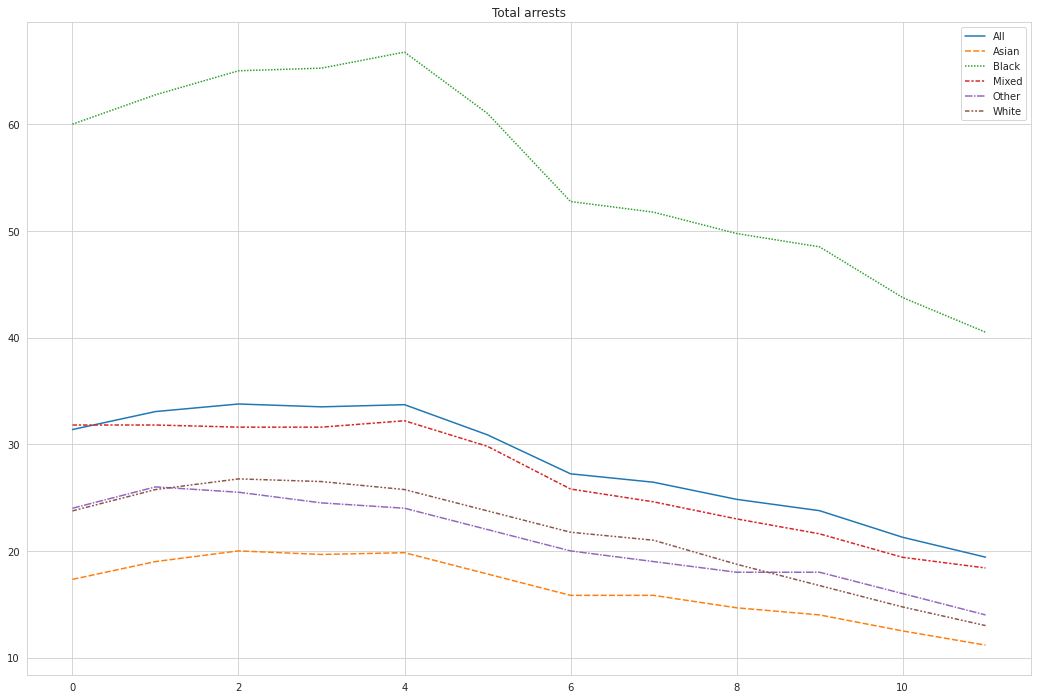

In [14]:
arrest_all_df = pd.read_csv('/content/content/data/arrest_all.csv')
fig, ax = plt.subplots(figsize=(18,12), sharey='all')
sns.lineplot(data=arrest_all_df)
ax.set_title('Total arrests (Figure 1 in report)')

In [17]:
arrest_df_manchester = pd.read_csv('/content/content/data/arrest_manchester.csv')
arrest_df_london = pd.read_csv('/content/content/data/arrest_london.csv')
arrest_df_essex = pd.read_csv('/content/content/data/arrest_essex.csv')
arrest_df_lancashire = pd.read_csv('/content/content/data/arrest_lancashire.csv')
arrest_df_suffolk = pd.read_csv('/content/content/data/arrest_suffolk.csv')
arrest_df_wiltshire = pd.read_csv('/content/content/data/arrest_wiltshire.csv')

Text(0.5, 1.0, 'Wiltshire Arrests')

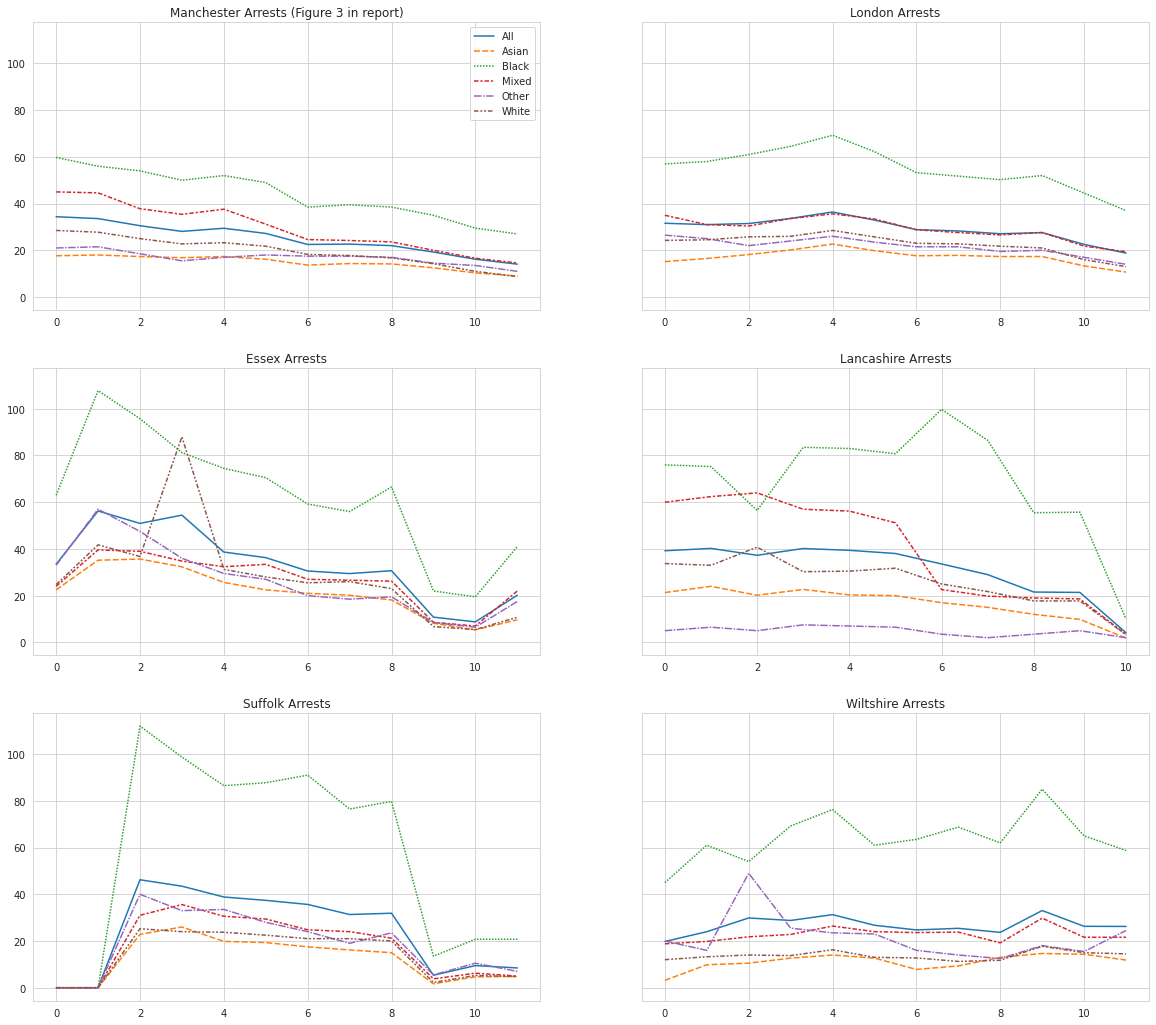

In [41]:
fig, ax = plt.subplots(3,2, figsize=(20,18), sharey='all')
sns.lineplot(data=arrest_df_manchester, ax=ax[0,0], legend=True)
sns.lineplot(data=arrest_df_london, ax=ax[0,1], legend=False)
sns.lineplot(data=arrest_df_essex, ax=ax[1,0], legend=False)
sns.lineplot(data=arrest_df_lancashire, ax=ax[1,1], legend=False)
sns.lineplot(data=arrest_df_suffolk, ax=ax[2,0], legend=False)
sns.lineplot(data=arrest_df_wiltshire, ax=ax[2,1], legend=False)
ax[0,0].set_title('Manchester Arrests (Figure 3 in report)')
ax[0,1].set_title('London Arrests')
ax[1,0].set_title('Essex Arrests')
ax[1,1].set_title('Lancashire Arrests')
ax[2,0].set_title('Suffolk Arrests')
ax[2,1].set_title('Wiltshire Arrests')


In [30]:
officer_df = pd.read_csv('/content/content/data/data_all.csv')
officer_df['Time'] = officer_df['Time'].str[:-3]
officer_df = officer_df.drop(columns=['Unnamed: 0'])
officer_df['BAME Officers'] = officer_df['Asian Officers'] + officer_df['Black Officers'] + officer_df['Mixed Officers'] + officer_df['Other Officers']
officer_df

,Time,All,Asian,Black,Mixed,Other,White,Asian Officers,Black Officers,Mixed Officers,Other Officers,White Officers,BAME Officers
0,2006,31.376667,17.333333,60.00,31.8,24.0,23.75,2111,1350,1419,632,134372,5512
1,2007,33.060000,19.000000,62.75,31.8,26.0,25.75,2231,1371,1525,656,134000,5783
2,2008,33.770000,20.000000,65.00,31.6,25.5,26.75,2472,1427,1699,689,135651,6287
3,2009,33.503333,19.666667,65.25,31.6,24.5,26.50,2607,1446,1844,745,135293,6642
4,2010,33.706667,19.833333,66.75,32.2,24.0,25.75,2582,1442,1838,754,130870,6616
5,2011,30.876667,17.833333,61.00,29.8,22.0,23.75,2607,1420,1871,766,125579,6664
6,2012,27.226667,15.833333,52.75,25.8,20.0,21.75,2563,1361,1865,749,121086,6538
7,2013,26.436667,15.833333,51.75,24.6,19.0,21.00,2665,1352,1922,776,119071,6715
8,2014,24.833333,14.666667,49.75,23.0,18.0,18.75,2795,1373,2028,785,117757,6981
9,2015,23.770000,14.000000,48.50,21.6,18.0,16.75,2881,1433,2096,808,114437,7218


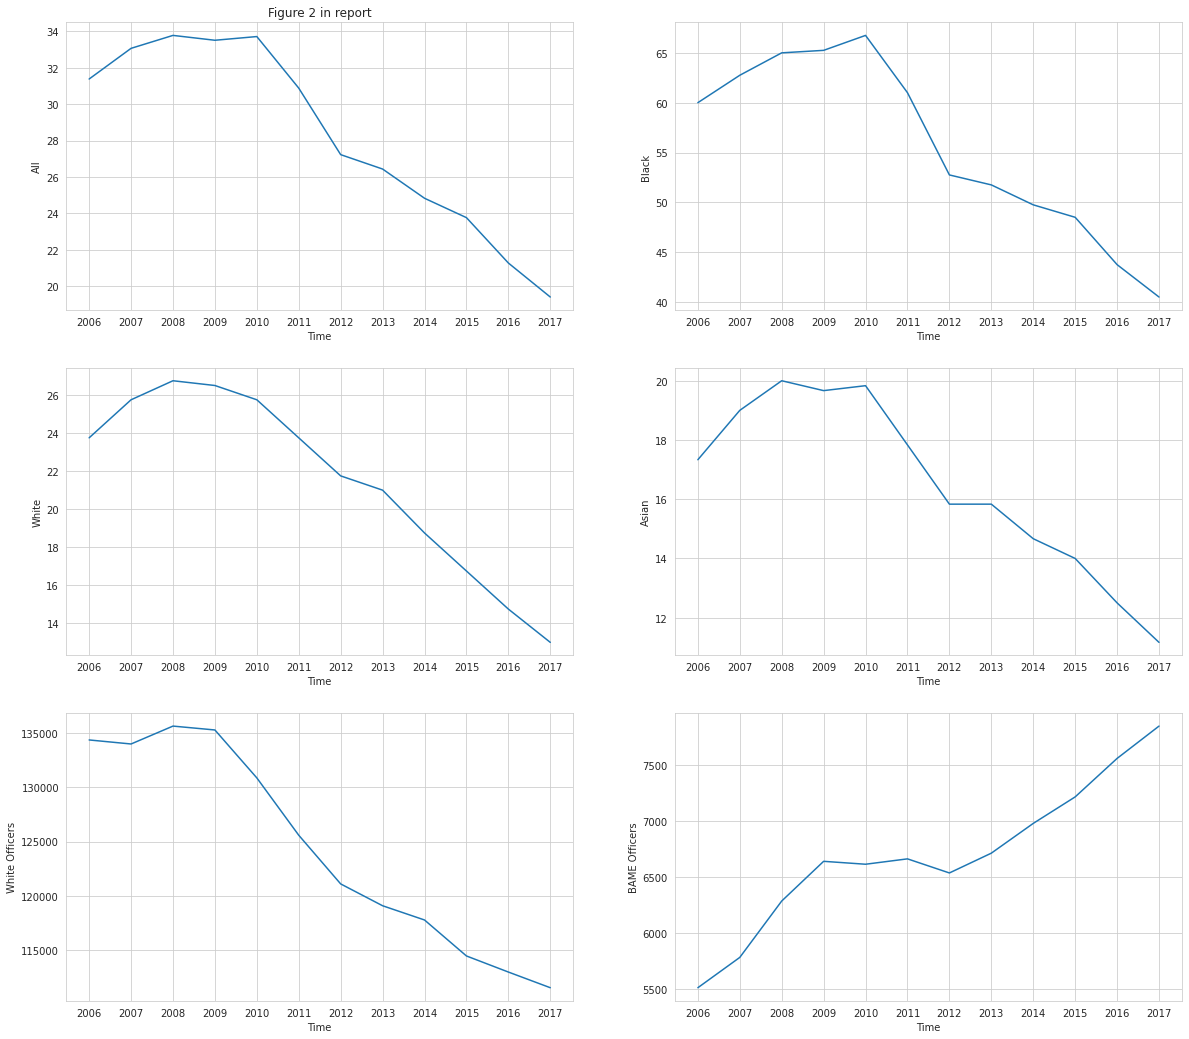

In [40]:
fig, ax = plt.subplots(3,2, figsize=(20,18))
ax[0][0].set_title('Figure 2 in report')
sns.lineplot(data=officer_df, x='Time', y='All', ax=ax[0][0])
sns.lineplot(data=officer_df, x='Time', y='Black', ax=ax[0][1])
sns.lineplot(data=officer_df, x='Time', y='White', ax=ax[1][0])
sns.lineplot(data=officer_df, x='Time', y='Asian', ax=ax[1][1])
sns.lineplot(data=officer_df, x='Time', y='White Officers', ax=ax[2][0])
sns.lineplot(data=officer_df, x='Time', y='BAME Officers', ax=ax[2][1])

In [33]:
# Linear regression function - attempting to find pattern in data
def linear_reg(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
  regressor = LinearRegression()
  regressor.fit(X_train, y_train)
  print(regressor.intercept_)
  print(regressor.coef_)
  y_pred = regressor.predict(X_test)
  dataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
  print(dataset)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
  print('Coefficient of Determination: %.2f'% metrics.r2_score(y_test, y_pred))

In [34]:
X = df.iloc[:, 8:].values
y = df.iloc[:, 3].values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [37]:
linear_reg(X, y)

-32.82354192500084
[-0.0126025   0.00071118  0.01699353  0.00717777  0.00035702]
      Actual  Predicted
0  15.833333  16.143554
1  11.166667  12.192971
2  19.833333  19.031874
Mean Absolute Error: 0.7126615694101398
Mean Squared Error: 0.5972916935209256
Root Mean Squared Error: 0.7728464876810437
Coefficient of Determination: 0.95
